In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt


In [2]:
with open("dataset1.txt") as f:
#         next(f, None)
        data = [line for line in csv.reader(f, delimiter=" ",quoting=csv.QUOTE_NONNUMERIC)]
    

In [3]:
data = np.array(data)

Part a) There are 2 clusters in dataset 1

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0
 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 

In [5]:
y = kmeans.predict(data)

In [6]:
y.shape

(500,)

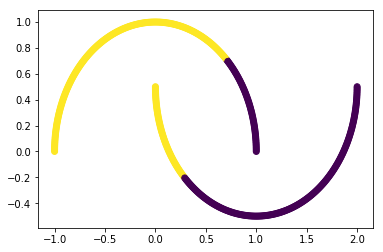

In [7]:
plt.scatter(data[:,0],data[:,1], c = y)

Part b) Implemented db scan and used it on dataset1


In [8]:
def dbscan(data,minpts, eps ):
    c=0
    lableOfCluster = np.zeros(data.shape[0]) # initialise lable array
    for p in range(data.shape[0]):
        if(lableOfCluster[p] != 0): # if already labled
            continue
        neighbours = []
        for neighPoint in range(data.shape[0]):#finding neighbours
            dist = np.linalg.norm(data[p] - data[neighPoint]) # calculating distance
            if(dist < eps):
                neighbours.append(neighPoint)
        if(len(neighbours) >= minpts):# growing the cluster size
            i = 0
            c +=1
            queue = [p]
            lableOfCluster[p] =  c
            while i < len(queue):
                p  = queue[i]
                neighbours = []
                for neighPoint in range(data.shape[0]):
                    dist = np.linalg.norm(data[p] - data[neighPoint]) # calculating distance
                    if(dist < eps):
                        neighbours.append(neighPoint)
                if(len(neighbours) < minpts):
                    i += 1
                    continue
                for neighPoint in neighbours:
                    if lableOfCluster[neighPoint] == 0: # assigning new lable
                        lableOfCluster[neighPoint] = c
                        queue.append(neighPoint)
                    if(lableOfCluster[neighPoint] == -1): # assigning new lable
                        lableOfCluster[neighPoint] = c
                i+=1
        if(len(neighbours) < minpts):
            lableOfCluster[p] = -1

    return lableOfCluster            

In [9]:
n  = dbscan(data,  3, .05)

In [10]:
n

array([1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2.,
       1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
       2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1.,
       1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
       2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2.,
       1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2.,
       2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2.,
       1., 2., 1., 1., 1.

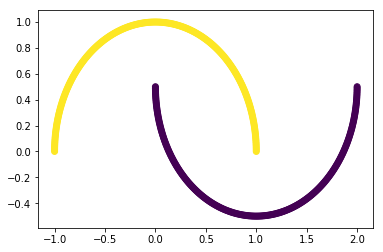

In [11]:
plt.scatter(data[:,0],data[:,1], c = n)

part c) Kmeans is not able to correctly cluster but dbscan is able to cluster properly. It is so as kmeans assigns clusters based on the distance from centroid and dbscan does it based on reachability from points.

part d) Observations:<br>
1) Kmeans is able to detect 3 clusters, it marks the outliers as 1 cluster, and combines 2 of the proper clusters as 1. In total it gives 3 clusters.<br>
2) Dbscan is able to detect all the 3 clusters and it assigns the outliers as another cluster. So in total 4 clusters.<br>
Pros and cons: <br>
Parameter tuning needed to be done for dbscan but kmeans can be used directly.<br>
Dbscan was able to properly cluster but kmeans was not able to .<br>
Dbscan takes more time to run that kmeans.<br>
Dbscan doesn't works well over clusters with different densities.

In [12]:
with open("dataset2.txt") as f:
#         next(f, None)
        data2 = [line for line in csv.reader(f, delimiter=" ",quoting=csv.QUOTE_NONNUMERIC)]
    

In [13]:
data2 = np.array(data2)

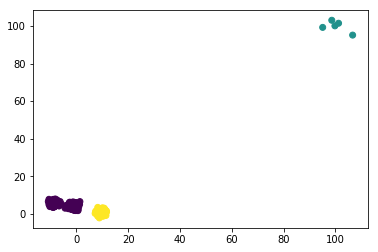

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data2)
y = kmeans.predict(data2)
plt.scatter(data2[:,0],data2[:,1], c = y)

In [15]:
data2.shape

(500, 2)

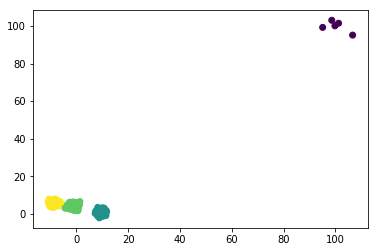

In [16]:
n  = dbscan(data2,  3, 1.5)
plt.scatter(data2[:,0],data2[:,1], c = n[:])